# Exploratory Data Analysis (EDA)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
students = pd.read_csv('Updated_Cleaned_Data.csv')
students.head()

,Profile Id,Learner SignUp DateTime,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Last Name,Date of Birth,Gender,Mobile Number,...,SignUp Month,SignUp Year,Time in Opportunity,Time in Opportunity (Days),Age of Learner x Time in Opportunity,Engagement Score,SignUp Day of Week,Last Engagement Date,Days Since Last Engagement,High Engagement
0,00628747-9775-4a85-a179-4d5007ccb8b7,2023-05-01 05:29:16,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,Bembadi,2000-08-16,Female,919381442895,...,5.0,2023.0,604.015278,604.0,14496.0,248.806111,Monday,2022-11-03 18:30:39,178.0,1
1,019c7a24-b72f-490c-ae28-ee3bf85eab4d,2023-05-31 07:11:04,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Fardeen,Shroff,2001-09-09,Male,919820278783,...,5.0,2023.0,604.015278,604.0,13892.0,248.506111,Wednesday,2022-11-03 18:30:39,208.0,1
2,01ca6306-aa78-4a5a-9634-d546723751a7,2023-03-20 16:36:30,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,SIDDHARTH,RAJAWAT,2005-12-22,Male,919870953256,...,3.0,2023.0,604.015278,604.0,10872.0,247.006111,Monday,2022-11-03 18:30:39,136.0,1
3,01ffe907-881a-4fdb-ae33-650cc2de218b,2023-05-11 03:40:33,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vanshika,Varshney,1998-06-26,Female,919549824344,...,5.0,2023.0,604.015278,604.0,15704.0,249.406111,Thursday,2022-11-03 18:30:39,188.0,1
4,021fd9d4-271a-41c2-9fab-602c5ffa264c,2023-01-28 21:56:47,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Precious,Christopher,1997-06-30,Female,2349091771856,...,1.0,2023.0,604.015278,604.0,16308.0,249.706111,Saturday,2022-11-03 18:30:39,86.0,1


In [39]:
# Creating a column for students that have graduated, and calculting it with 'Graduation Date' and checking if the date has passed.
from datetime import datetime
students['Graduation Date'] = pd.to_datetime(students['Graduation Date'])

def determine_student_status(row):
    if pd.isna(row['Graduation Date']):
        return 'Not Graduated'
    elif row['Graduation Date'] < datetime.now():
        return 'Graduated'
    else:
        return 'Not Graduated'

students['Student Status'] = students.apply(determine_student_status, axis=1)

In [40]:
# 1. Count the number of NaN values in each column
empty_per_column = students.isna().sum()

# 2. Filter columns that have at least one NaN
columns_with_empty = empty_per_column[empty_per_column > 0]

# 3. Total number of NaN values across the entire dataframe
total_empty = students.isna().sum().sum()

print(f"Columns with empty entries:\n{columns_with_empty}")
print(f"Total number of empty entries: {total_empty}")

Columns with empty entries:
Series([], dtype: int64)
Total number of empty entries: 0


In [41]:
students.columns

Index(['Profile Id', 'Learner SignUp DateTime', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'First Name',
       'Last Name', 'Date of Birth', 'Gender', 'Mobile Number',
       'Address Line 1', 'City', 'State', 'Country', 'Zip Code',
       'Institution Name', 'Graduation Date', 'Current Student Status',
       'Current/Intended Major', 'Entry created at', 'Status Description',
       'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age of Learner',
       'Engagement Duration', 'SignUp Month', 'SignUp Year',
       'Time in Opportunity', 'Time in Opportunity (Days)',
       'Age of Learner x Time in Opportunity', 'Engagement Score',
       'SignUp Day of Week', 'Last Engagement Date',
       'Days Since Last Engagement', 'High Engagement', 'Student Status'],
      dtype='object')

There are 0 empty rows, so we can just start working with the other EDA steps.

In [42]:
# Statistical information:

students.describe()

,Mobile Number,Zip Code,Graduation Date,Status Code,Age of Learner,Engagement Duration,SignUp Month,SignUp Year,Time in Opportunity,Time in Opportunity (Days),Age of Learner x Time in Opportunity,Engagement Score,Days Since Last Engagement,High Engagement
count,2.024000e+03,2.024000e+03,2024,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,2.311948e+12,3.084315e+05,2023-06-18 11:05:13.043478272,1072.129447,24.295455,0.453127,5.803360,2023.175889,395.755613,395.377964,9587.902668,165.590882,64.412549,0.539032
min,9.112340e+05,1.000000e+00,1989-12-01 00:00:00,1050.000000,13.000000,0.000000,1.000000,2023.000000,-6.875000,-7.000000,-210.000000,3.550000,-512.000000,0.000000
25%,1.618602e+10,6.310300e+04,2022-08-01 00:00:00,1070.000000,22.000000,0.298246,3.000000,2023.000000,63.603634,63.000000,1386.000000,31.874722,-76.000000,0.000000
50%,9.180748e+11,9.281500e+04,2024-06-01 00:00:00,1070.000000,24.000000,0.479950,6.000000,2023.000000,604.015278,604.000000,12080.000000,247.306111,65.000000,1.000000
75%,9.199302e+11,5.000580e+05,2025-05-01 00:00:00,1080.000000,26.000000,0.617794,8.000000,2023.000000,604.015278,604.000000,15100.000000,249.106111,223.000000,1.000000
max,8.800199e+13,8.921808e+07,2030-11-01 00:00:00,1120.000000,56.000000,1.000000,12.000000,2024.000000,913.000000,913.000000,51128.000000,382.000000,475.000000,1.000000
std,6.618342e+12,2.024375e+06,NaN,9.357039,4.924407,0.212507,3.177384,0.380820,284.151325,284.488948,7348.799509,113.651149,196.395772,0.498597


## Graphical Analysis

# SignUp Trends

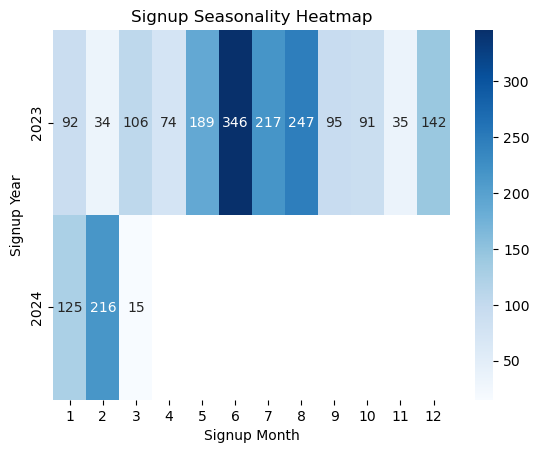

In [43]:
students['Learner SignUp DateTime'] = pd.to_datetime(students['Learner SignUp DateTime'])
students['SignUp Month'] = students['Learner SignUp DateTime'].dt.month
students['SignUp Year'] = students['Learner SignUp DateTime'].dt.year
signup_heatmap = students.groupby(['SignUp Year', 'SignUp Month'])['Profile Id'].count().unstack()
sns.heatmap(signup_heatmap, cmap='Blues', annot=True, fmt='g')
plt.title('Signup Seasonality Heatmap')
plt.xlabel('Signup Month')
plt.ylabel('Signup Year')
plt.show()

This Heatmap shows the overall trend of signup growth over time.

*   In May & June of 2023, highest number of signups were recorded.
*   In Novemeber of 2023, 2nd lowest signup were recorded only 35 number of sign and only 2 signup higher than February of 2023.
*   In February of 2024, Signup numbers almost reached the same signup numbers as July of 2023.

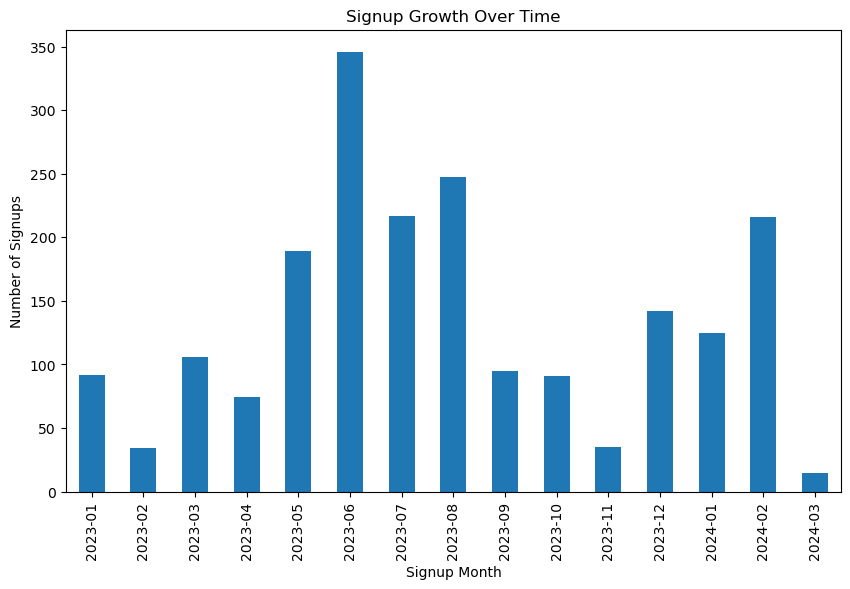

In [44]:
signups_by_month = students.groupby(students['Learner SignUp DateTime'].dt.to_period('M'))['Profile Id'].count()
signups_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Signup Growth Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of Signups')
plt.show()

# Hypotheses For SignUp Trends
*  Seasonal Sign-Up Peaks: If the heatmap reveals consistent peaks in certain months (e.g., January, September), you might hypothesize that sign-up rates increase at the start of the calendar or academic year. This could be due to learners starting new courses or aligning with new academic or fiscal cycles.

*  Yearly Sign-Up Variations: If there’s a notable increase or decrease across years, it could indicate shifts in interest or demand over time. For instance, if sign-ups increased significantly in recent years, you might hypothesize that growing awareness or marketing efforts are positively influencing sign-up trends.

*  Low Engagement Months: If certain months show persistently low sign-up counts, it might suggest that external factors (like holidays, exams, or seasonal breaks) impact learner availability. Targeted marketing or promotions during these low months could boost sign-ups.

*  Impact of External Events: If sign-up patterns change in specific years (e.g., a notable dip or spike), this may correlate with external events (like a pandemic, policy changes, or new program launches). Hypothesize that such events influence user enrollment behavior.

# Completion Trends

In [45]:
students['Current Student Status'].unique()

array(['Graduate Program Student', 'High School Student',
       'Undergraduate Student', 'Not in Education'], dtype=object)

In [46]:
students['Completed'] = students['Student Status'] == 'Graduated'
completion_rate_by_month = students.groupby(students['Learner SignUp DateTime'].dt.to_period('M'))['Completed'].mean()

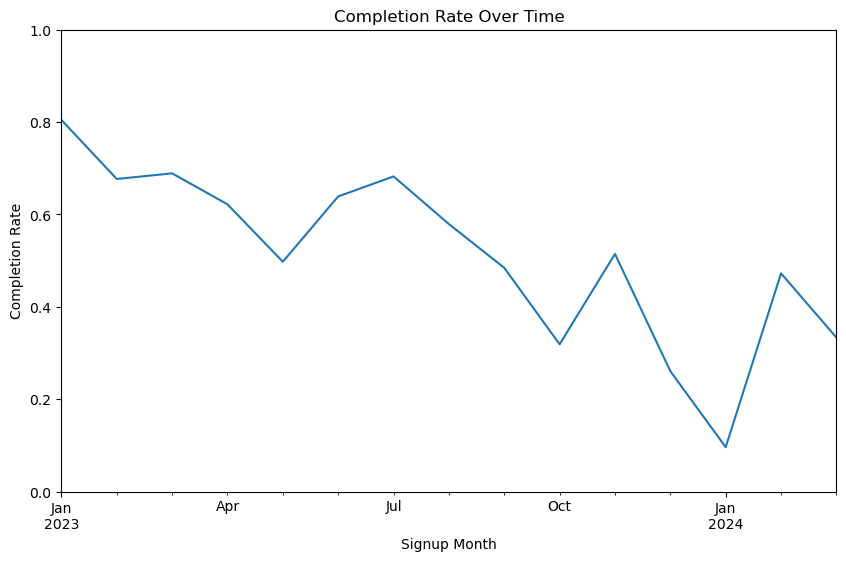

In [47]:
completion_rate_by_month.plot(kind='line', figsize=(10, 6))
plt.title('Completion Rate Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)  
plt.show()

This line graph visualizes the trend of completion rates over time.
Completion Rate of students has gone down over time where it was highest in Janurary of 2023. In the next year of same month it was also the lowest.

Hypotheses for Completion Trends:
*  Temporal Impact: The completion rate of students varies across different months, with some months showing significantly higher rates than others due to factors like course design and seasonal influences.
*  Significance of Signup Month: Students who sign up in the fall semester (September to November) have higher completion rates compared to those who enroll in the spring semester (January to May) because of increased motivation and engagement.
*  Graduation Correlation: There is a positive correlation between the percentage of students marked as 'Graduated' and the average completion rate over time, indicating that as more students graduate, overall completion rates improve.

# Patterns and Correlations


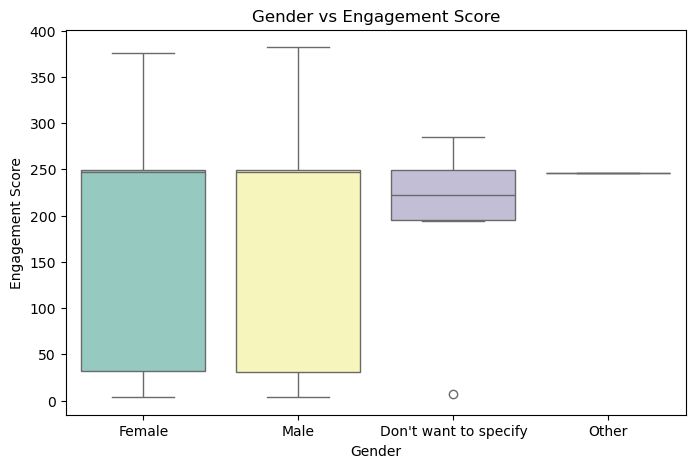

In [48]:
# Scatter plot of SignUp Month vs. Completed
plt.figure(figsize=(8, 5))
sns.boxplot(x=students['Gender'], y=students['Engagement Score'], hue=students['Gender'],palette="Set3")
plt.title("Gender vs Engagement Score")
plt.xlabel("Gender")
plt.ylabel("Engagement Score")
plt.show();

*  Males and Females have almost the same highest and lowest engagement score.
*  Compared to the Males and Females, students who haven't specifies their gender have much higher lowest engagement score same same highest engagement score.

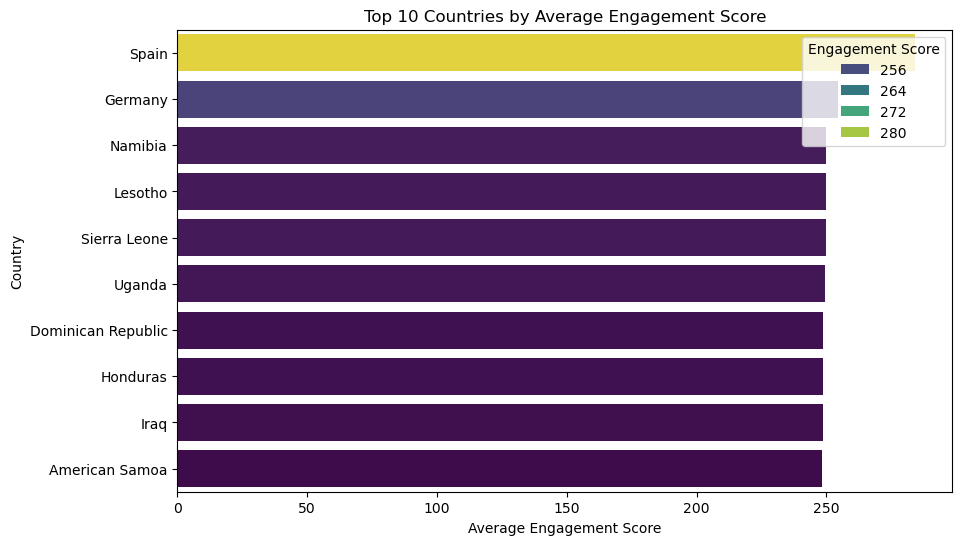

In [49]:
# Country vs Average Engagement Score
country_engagement = students.groupby('Country')['Engagement Score'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_engagement.values, y=country_engagement.index, hue=country_engagement, palette="viridis")
plt.title("Top 10 Countries by Average Engagement Score")
plt.xlabel("Average Engagement Score")
plt.ylabel("Country")
plt.show()

All the countries have same average engagement score except for Spain which has almost 10% more average engagement score than the other countries.

# Hypotheses For Patterns and Correalation:
*  Gender-Based Engagement: Different genders may have distinct preferences for engagement. Tailored content or gender-based incentives could improve engagement.
*  Country-Based Strategies: Countries with lower average engagement scores could benefit from location-specific content or tailored communication to boost involvement.

### Gender Distribution

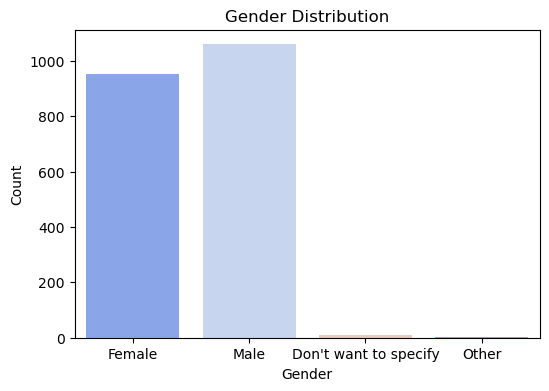

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=students, hue='Gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Tells us that there are slightly more Males than Females in our dataset.


### Age distribution

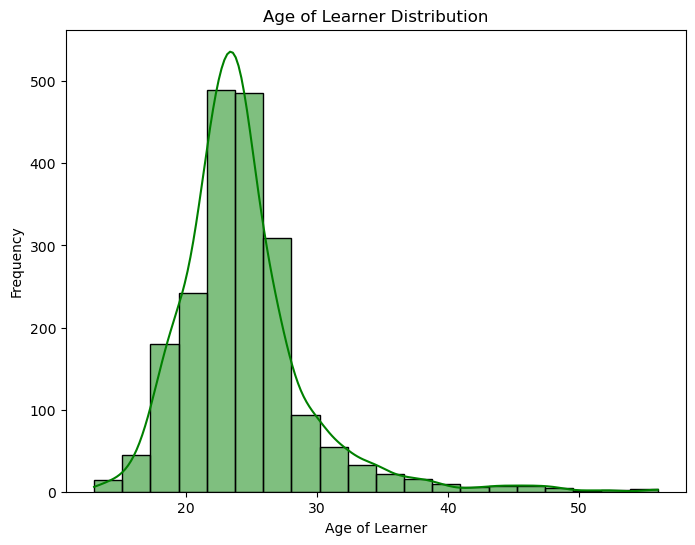

In [51]:
# Age distribution
plt.figure(figsize=(8,6))
sns.histplot(students['Age of Learner'], bins=20, kde=True, color='green')
plt.title('Age of Learner Distribution')
plt.xlabel('Age of Learner')
plt.ylabel('Frequency')
plt.show()

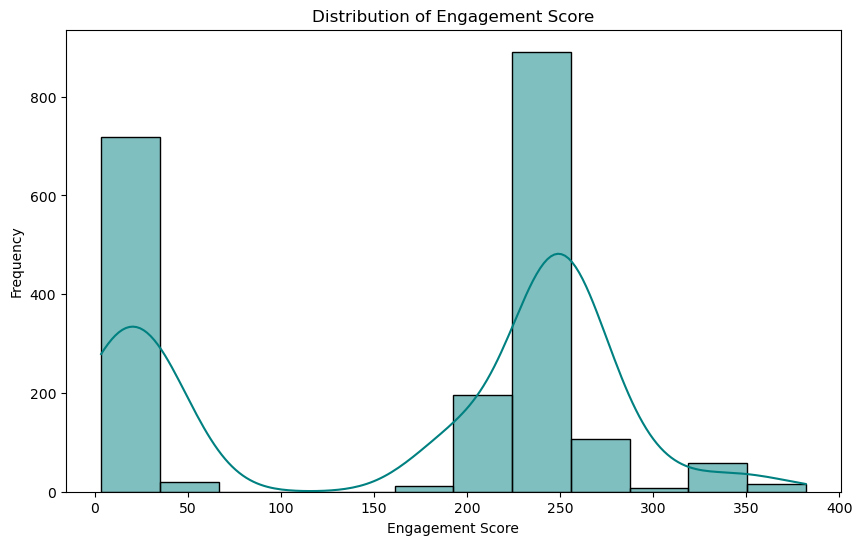

In [52]:
# Engagement Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(students['Engagement Score'], kde=True, color='teal')
plt.title("Distribution of Engagement Score")
plt.xlabel("Engagement Score")
plt.ylabel("Frequency")
plt.show()

Engagement Score Distribution: The distribution appears relatively normal but slightly skewed. Most learners have engagement scores within a central range, suggesting common patterns or limits in learner engagement.

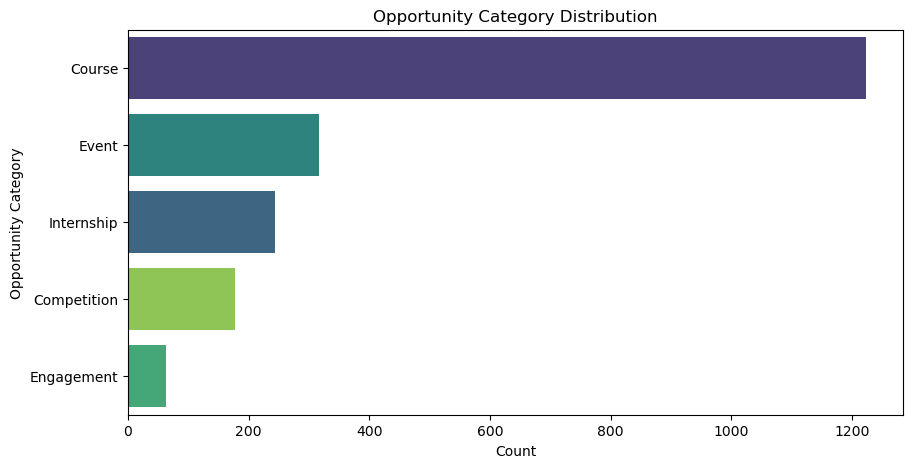

In [53]:
# Opportunity Category Counts
plt.figure(figsize=(10, 5))
sns.countplot(data=students, y="Opportunity Category", palette="viridis", hue='Opportunity Category',order=students['Opportunity Category'].value_counts().index)
plt.title("Opportunity Category Distribution")
plt.xlabel("Count")
plt.ylabel("Opportunity Category")
plt.show()

Opportunity Category Distribution: A single category (likely "Course") dominates, suggesting that most learners are engaged in similar types of opportunities. Other opportunity types have fewer participants, which may reflect limited access or preference trends.

### Corelation between Age and Engagement Score

Tells us that most users in our dataset have an age between 20 and 27, with the highest being 22 and 23

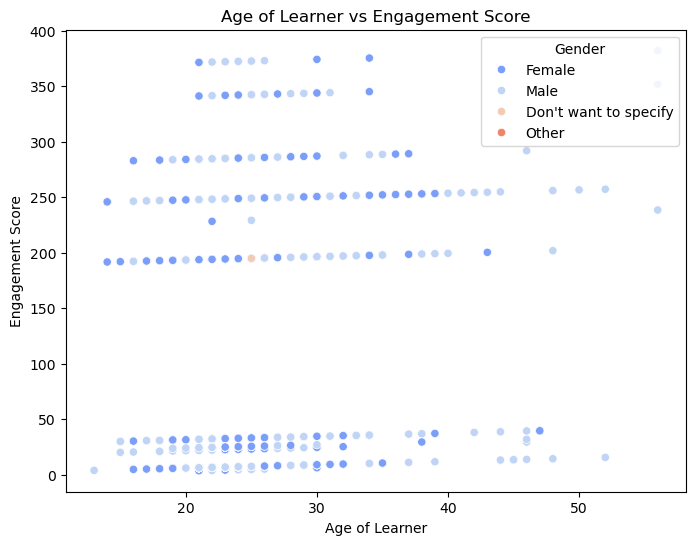

In [54]:
# Scatter plot of Age vs. Engagement Score
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age of Learner', y='Engagement Score', data=students, hue='Gender', palette='coolwarm')
plt.title('Age of Learner vs Engagement Score')
plt.xlabel('Age of Learner')
plt.ylabel('Engagement Score')
plt.show()

**Age distribution:** The age range of the learners is from approximately 15 to 50 years old.
**Engagement score distribution:** The engagement scores range from 0 to around 350, with a clustering of scores around 200-250.

**Gender differences:**
**Male:** There seems to be a slight trend of higher engagement scores among males, especially in the younger age groups.
**Female:** Female engagement scores are more spread out, with a slightly higher concentration in the lower engagement ranges.
Other: The "Other" and "Don't want to specify" categories have limited data points, making it difficult to draw conclusions about their engagement patterns.

### Oppurtunity (Days) Distribution

Explore how long learners have been engaged in the opportunity using a histogram.

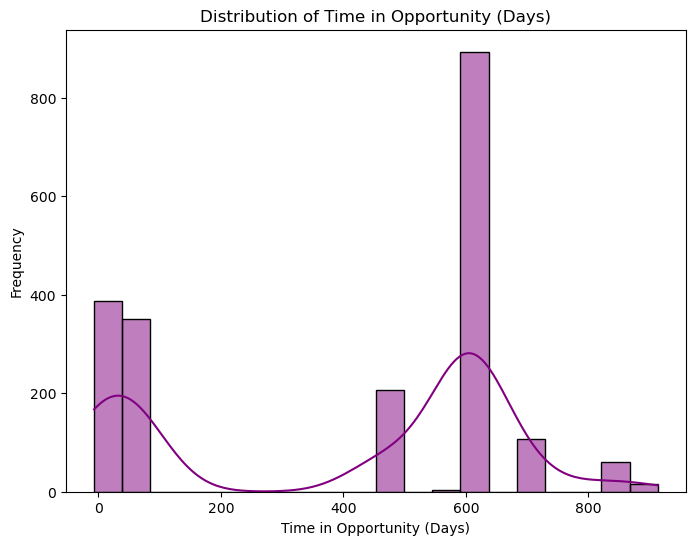

In [55]:
# Time in Opportunity distribution
plt.figure(figsize=(8,6))
sns.histplot(students['Time in Opportunity (Days)'], bins=20, kde=True, color='purple')
plt.title('Distribution of Time in Opportunity (Days)')
plt.xlabel('Time in Opportunity (Days)')
plt.ylabel('Frequency')
plt.show()


- Users were initially engaged in first 70-80 days.
- Then a spike at 450ish day mark.
- Then after 600 days which is very surprising, should not have happened. Like why would a user be engaging for 600 days in 1 month internship.
- Then it settles down at 800 day mark.

### Engagement Score by SignUp Month

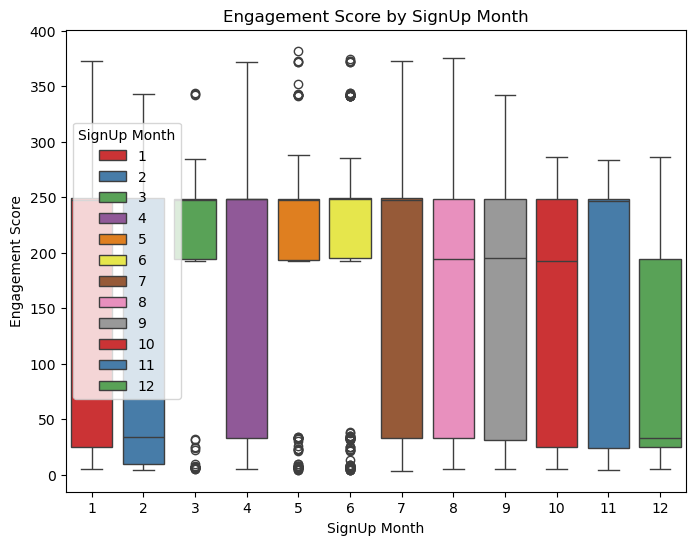

In [56]:
# Engagement Score by SignUp Month
plt.figure(figsize=(8,6))
sns.boxplot(x='SignUp Month', y='Engagement Score', data=students, hue='SignUp Month', palette='Set1')
plt.title('Engagement Score by SignUp Month')
plt.xlabel('SignUp Month')
plt.ylabel('Engagement Score')
plt.show()

- Month 7 has one of the highest median engagement scores, suggesting users signing up in this month tend to have higher engagement.
- Months 1 and 4 have the largest variability, as their engagement scores are spread over a wider range.
- Some months have a higher number of outliers (e.g., months 4 and 6), indicating that while most users in these months had similar engagement, a few users exhibited much higher or lower engagement.

### Corelation Heatmap

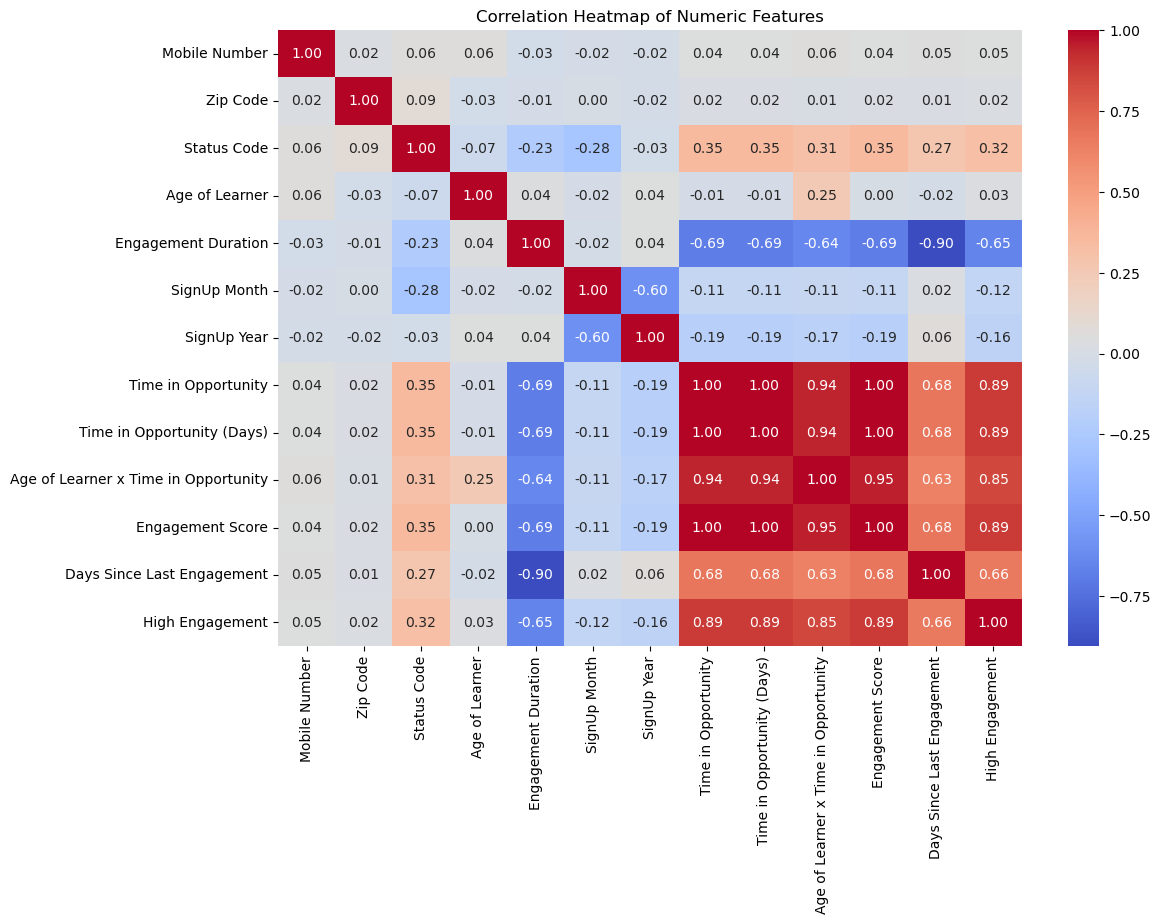

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Select only numeric columns for correlation calculation
numeric_students = students.select_dtypes(include=['number'])

sns.heatmap(numeric_students.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Current Student Status by Opportunity Category:

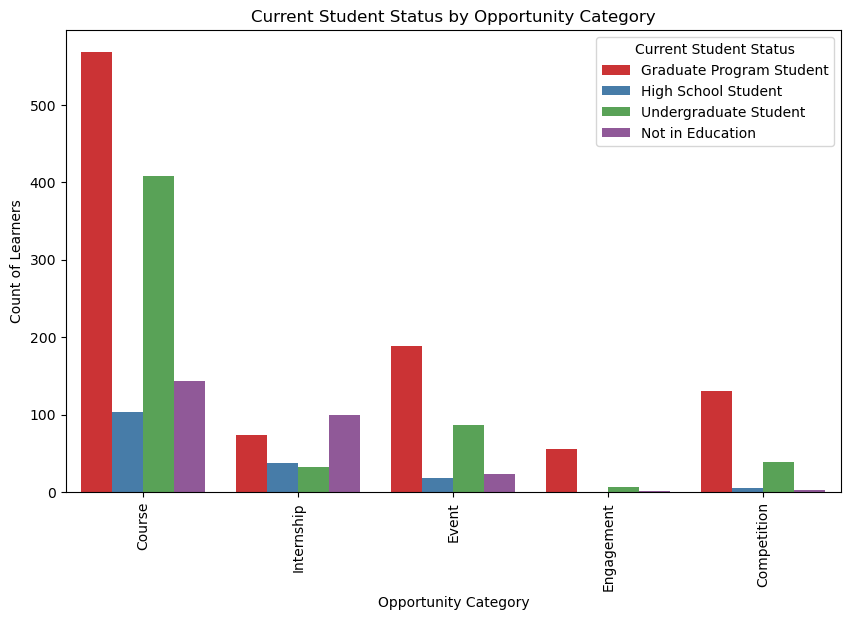

In [58]:
plt.figure(figsize=(10,6))
sns.countplot(x='Opportunity Category', hue='Current Student Status', data=students, palette='Set1')
plt.title('Current Student Status by Opportunity Category')
plt.xlabel('Opportunity Category')
plt.ylabel('Count of Learners')
plt.xticks(rotation=90)
plt.show()

### Application Status by Opportunity:

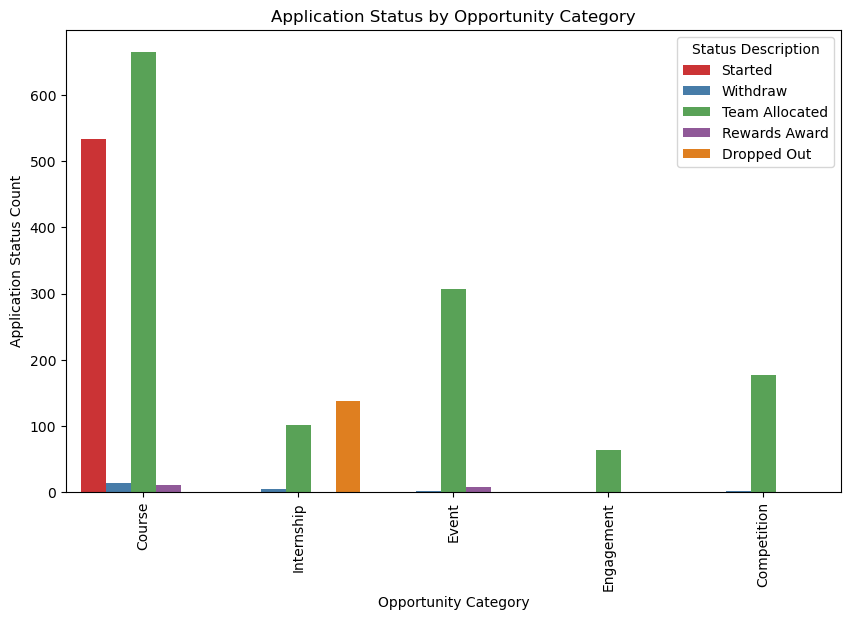

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='Opportunity Category', hue='Status Description', data=students, palette='Set1')
plt.title('Application Status by Opportunity Category')
plt.xlabel('Opportunity Category')
plt.ylabel('Application Status Count')
plt.xticks(rotation=90)
plt.show()

### Country-wise Learner Distribution

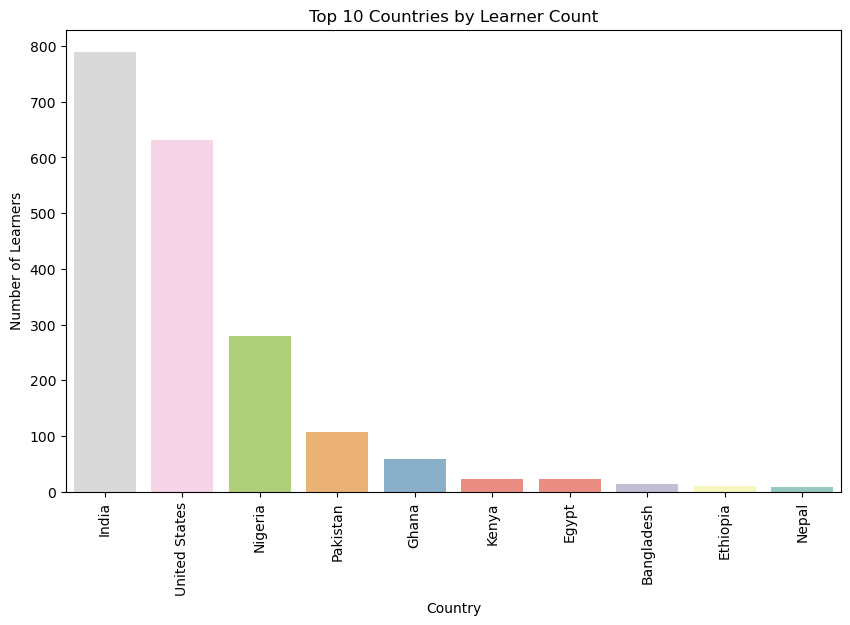

In [60]:
plt.figure(figsize=(10,6))
top_countries = students['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries, palette='Set3', legend=False)
plt.title('Top 10 Countries by Learner Count')
plt.xlabel('Country')
plt.ylabel('Number of Learners')
plt.xticks(rotation=90)
plt.show()

### Principal Component Analysis (PCA) for Dimensionality Reduction

Reduce the dataset's dimensions while preserving variance, helping to visualize patterns and groupings in high-dimensional data.

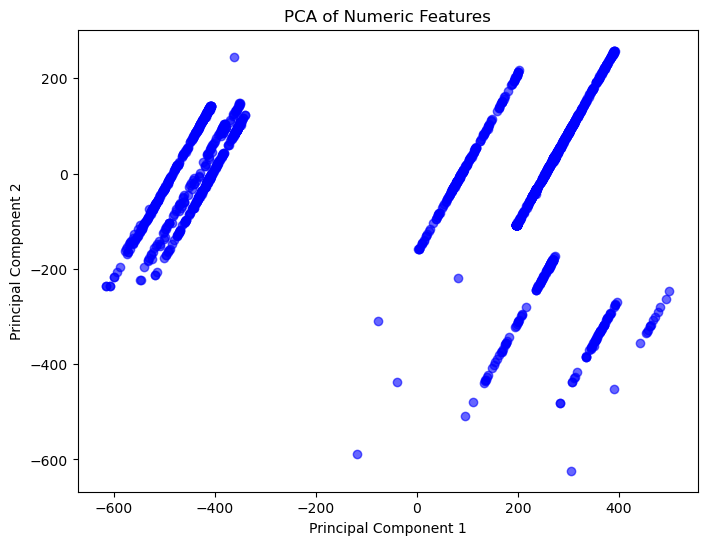

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(students[['Engagement Score', 'Time in Opportunity (Days)', 'Days Since Last Engagement']])

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c='blue', alpha=0.6)
plt.title('PCA of Numeric Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Clustering Analysis (K-Means)

Group learners into clusters based on their behaviors and attributes, such as Engagement Score, Time in Opportunity, and Days Since Last Engagement.

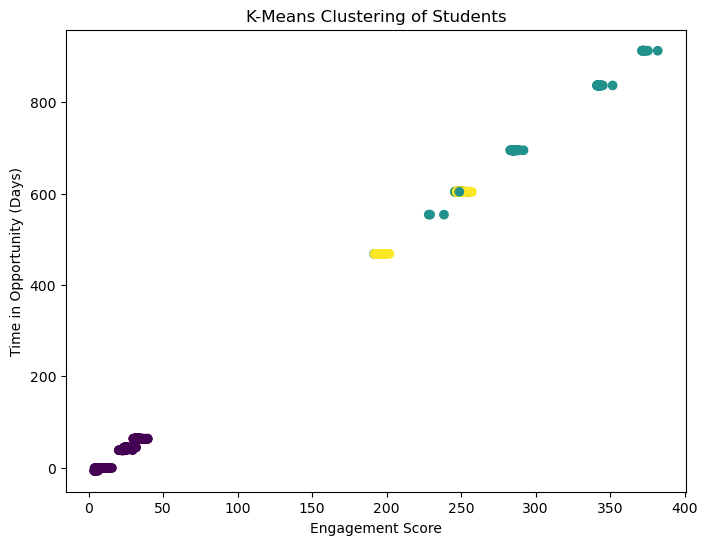

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  # Assume 3 clusters
students_clustered = students[['Engagement Score', 'Time in Opportunity (Days)', 'Days Since Last Engagement']].dropna()
kmeans.fit(students_clustered)

plt.figure(figsize=(8,6))
plt.scatter(students_clustered['Engagement Score'], students_clustered['Time in Opportunity (Days)'],
            c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering of Students')
plt.xlabel('Engagement Score')
plt.ylabel('Time in Opportunity (Days)')
plt.show()

Cluster 1 (Purple): Students with high engagement scores and a long time in opportunity. These students are likely highly engaged and have been exposed to the learning opportunity for a significant period.

Cluster 2 (Yellow): Students with moderate engagement scores and a moderate time in opportunity. These students show some engagement but may not be as deeply involved as the students in Cluster 1.

Cluster 3 (Teal): Students with low engagement scores and a short time in opportunity. These students are likely less engaged and have not had much exposure to the learning opportunity.

Identifying High-Engagement Students: Cluster 1 can be a target group for further engagement strategies or advanced learning opportunities.

Identifying At-Risk Students: Cluster 3 may require additional support or interventions to improve their engagement and learning outcomes.

Understanding Engagement Patterns: The clustering can help educators understand how different factors (time and engagement) influence student outcomes.

### Cohort Analysis

Cohort analysis is a powerful technique that helps businesses understand how groups of users, known as cohorts, behave over time. By grouping users based on shared characteristics like acquisition date or specific behaviors, businesses can track patterns and trends in their actions.

Track groups of learners based on their signup month (or any other variable) to see how their behavior (e.g., Engagement Score) changes over time.

   Cohort SignUp Date  Month Since SignUp
0  2023-5  2023-05-01                  17
1  2023-5  2023-05-01                  17
2  2023-3  2023-03-01                  19
3  2023-5  2023-05-01                  17
4  2023-1  2023-01-01                  21


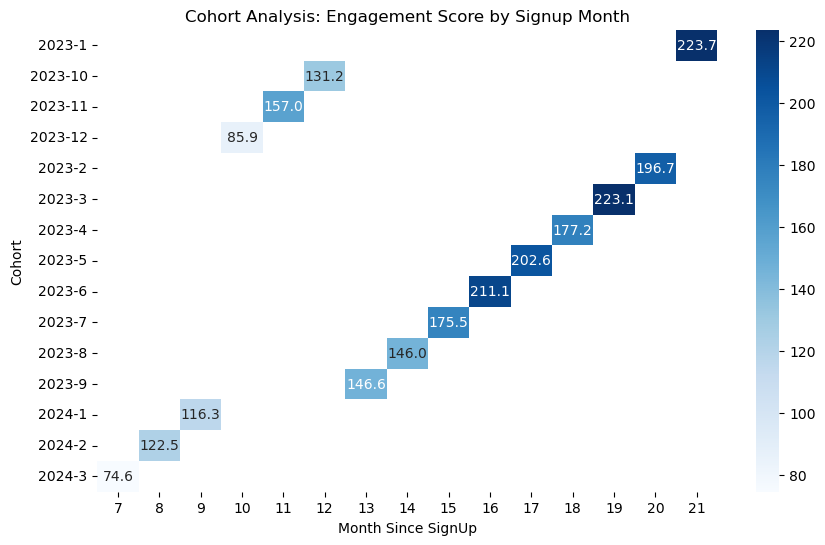

In [63]:
import pandas as pd
from datetime import datetime

# Sample dataset structure (replace this with actual data)
# students = pd.read_csv('your_data.csv') # Load your actual data here

# Ensure columns are correctly renamed and processed
students = students.rename(columns={'SignUp Year': 'year', 'SignUp Month': 'month'})

# Combine 'year' and 'month' into a 'Cohort' column
students['Cohort'] = students['year'].astype(str) + '-' + students['month'].astype(str)

# Now create 'SignUp Date' by assigning the day manually (1st of the month)
students['SignUp Date'] = pd.to_datetime(students[['year', 'month']].assign(day=1))

# Calculate 'Month Since SignUp' (difference between current date and signup date in months)
current_date = pd.to_datetime(datetime.now().date())
students['Month Since SignUp'] = ((current_date.year - students['SignUp Date'].dt.year) * 12 +
                                  (current_date.month - students['SignUp Date'].dt.month))

# Check if 'Cohort' column is created successfully
print(students[['Cohort', 'SignUp Date', 'Month Since SignUp']].head())  # Debugging step

# Perform the cohort analysis (grouping by 'Cohort' and 'Month Since SignUp')
cohort_pivot = students.groupby(['Cohort', 'Month Since SignUp'])['Engagement Score'].mean().unstack()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cohort_pivot, cmap='Blues', annot=True, fmt='.1f')
plt.title('Cohort Analysis: Engagement Score by Signup Month')
plt.show()

In [64]:
print(students.columns)

Index(['Profile Id', 'Learner SignUp DateTime', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'First Name',
       'Last Name', 'Date of Birth', 'Gender', 'Mobile Number',
       'Address Line 1', 'City', 'State', 'Country', 'Zip Code',
       'Institution Name', 'Graduation Date', 'Current Student Status',
       'Current/Intended Major', 'Entry created at', 'Status Description',
       'Status Code', 'Apply Date', 'Opportunity Start Date', 'Age of Learner',
       'Engagement Duration', 'month', 'year', 'Time in Opportunity',
       'Time in Opportunity (Days)', 'Age of Learner x Time in Opportunity',
       'Engagement Score', 'SignUp Day of Week', 'Last Engagement Date',
       'Days Since Last Engagement', 'High Engagement', 'Student Status',
       'Completed', 'Cohort', 'SignUp Date', 'Month Since SignUp'],
      dtype='object')


### Partial Dependence Plot (Machine Learning Context):

Visualize how specific features affect the predicted outcome (e.g., Engagement Score), using a trained machine learning model.

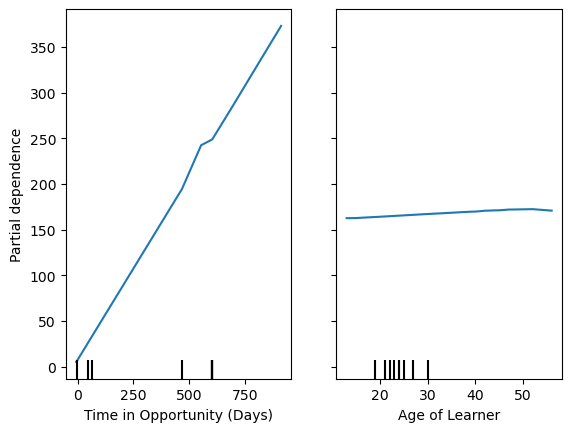

In [65]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a basic model
model = RandomForestRegressor()
X = students[['Time in Opportunity (Days)', 'Days Since Last Engagement', 'Age of Learner']]
y = students['Engagement Score']
model.fit(X, y)

# Plot Partial Dependence using PartialDependenceDisplay
features = ['Time in Opportunity (Days)', 'Age of Learner']
PartialDependenceDisplay.from_estimator(model, X, features=features)

# Show the plot
plt.show()

Time spent in an opportunity is a significant factor in predicting engagement. Longer exposure to an opportunity seems to correlate with higher engagement scores.
Age of the learner appears to have a negligible impact on engagement. The model suggests that age is not a strong predictor of engagement in this context.

### Pair Plot (Scatter Matrix):

A pair plot allows you to see the distribution of a variable in your dataset and the relationships between variables. It’s useful for seeing how features interact with one another.

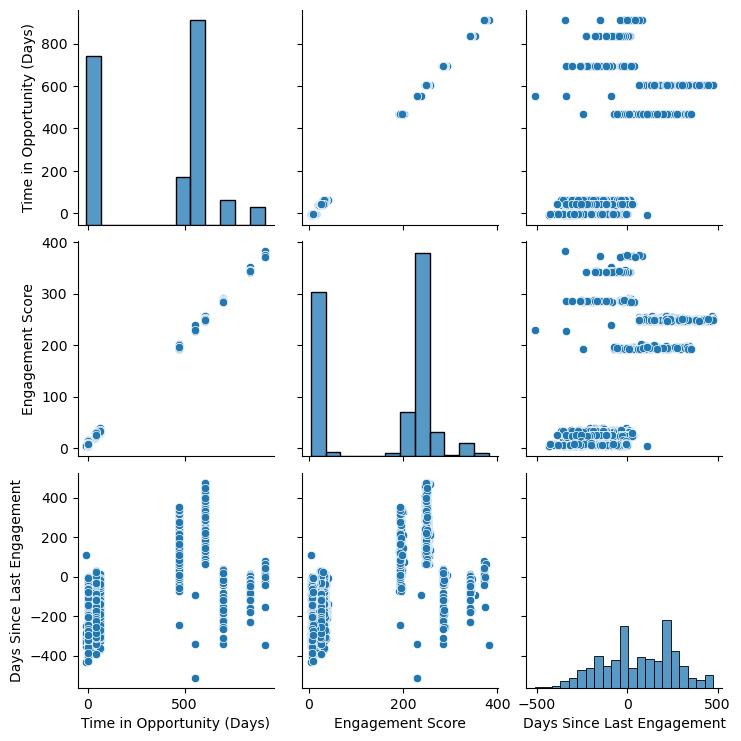

In [66]:
import seaborn as sns

# Pair plot of selected features
sns.pairplot(students[['Time in Opportunity (Days)', 'Engagement Score', 'Days Since Last Engagement']])
plt.show()